In [ ]:
# Feature engineering and training models based on the EDA analysis

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
from pathlib import Path
import os

In [250]:
path = Path("/teamspace/studios/this_studio/dataset/BIT_Admissions_2025-10-21_12-09-14.csv")

df = pd.read_csv(path)

In [251]:
# removing
df = df.drop(columns =["application_id", "country", "bit_program_applied"], errors="ignore")

In [252]:
target = ["admission_decision", "scholarship_tier"]
features = [col for col in df.columns if col not in target]

In [253]:
categorical = [col for col in df.columns if col in features and df[col].dtype == "object"]
numeric = [col for col in df.columns if col in features and df[col].dtype != "object"]

In [254]:
categorical, numeric

(['program_category',
  'degree_language',
  'english_test_type',
  'chinese_proficiency'],
 ['previous_gpa',
  'math_physics_background_score',
  'research_alignment_score',
  'publication_count',
  'recommendation_strength',
  'interview_score',
  'english_score'])

In [255]:
df.head()

,program_category,degree_language,previous_gpa,math_physics_background_score,research_alignment_score,publication_count,recommendation_strength,interview_score,english_test_type,english_score,chinese_proficiency,admission_decision,scholarship_tier
0,Undergraduate,Chinese-taught,2.33,4.7,4.2,0,6.6,68.2,DUOLINGO,77.159382,HSK4,Rejected,No Scholarship
1,Dual Degree,English-taught,3.64,8.5,7.9,0,7.3,73.4,TOEFL,109.379735,HSK2,Admitted,Partial Scholarship
2,Postgraduate,English-taught,2.75,3.8,1.7,0,4.7,57.3,TOEFL,75.164883,HSK1,Rejected,No Scholarship
3,Postgraduate,Chinese-taught,2.32,3.4,1.5,0,6.6,50.6,IELTS,4.375447,HSK3,Rejected,No Scholarship
4,Undergraduate,English-taught,3.10,4.5,4.6,0,6.4,89.0,TOEFL,82.506195,HSK1,Rejected,No Scholarship


In [256]:
for col in categorical:
    df[col] = df[col].str.lower().str.replace("-", "_").str.replace(" ", "_")

In [257]:
df.head()

,program_category,degree_language,previous_gpa,math_physics_background_score,research_alignment_score,publication_count,recommendation_strength,interview_score,english_test_type,english_score,chinese_proficiency,admission_decision,scholarship_tier
0,undergraduate,chinese_taught,2.33,4.7,4.2,0,6.6,68.2,duolingo,77.159382,hsk4,Rejected,No Scholarship
1,dual_degree,english_taught,3.64,8.5,7.9,0,7.3,73.4,toefl,109.379735,hsk2,Admitted,Partial Scholarship
2,postgraduate,english_taught,2.75,3.8,1.7,0,4.7,57.3,toefl,75.164883,hsk1,Rejected,No Scholarship
3,postgraduate,chinese_taught,2.32,3.4,1.5,0,6.6,50.6,ielts,4.375447,hsk3,Rejected,No Scholarship
4,undergraduate,english_taught,3.10,4.5,4.6,0,6.4,89.0,toefl,82.506195,hsk1,Rejected,No Scholarship


In [258]:
X = df[features]
Y = df[target]

In [259]:
X.head()

,program_category,degree_language,previous_gpa,math_physics_background_score,research_alignment_score,publication_count,recommendation_strength,interview_score,english_test_type,english_score,chinese_proficiency
0,undergraduate,chinese_taught,2.33,4.7,4.2,0,6.6,68.2,duolingo,77.159382,hsk4
1,dual_degree,english_taught,3.64,8.5,7.9,0,7.3,73.4,toefl,109.379735,hsk2
2,postgraduate,english_taught,2.75,3.8,1.7,0,4.7,57.3,toefl,75.164883,hsk1
3,postgraduate,chinese_taught,2.32,3.4,1.5,0,6.6,50.6,ielts,4.375447,hsk3
4,undergraduate,english_taught,3.10,4.5,4.6,0,6.4,89.0,toefl,82.506195,hsk1


In [260]:
X["chinese_proficiency"] = X["chinese_proficiency"].str.replace("hsk", "").astype(int)

In [261]:
Y.head()

,admission_decision,scholarship_tier
0,Rejected,No Scholarship
1,Admitted,Partial Scholarship
2,Rejected,No Scholarship
3,Rejected,No Scholarship
4,Rejected,No Scholarship


In [262]:
"""
Plan
- handle the outliers in publication count
- perform english exam type + exam score encoding
- econde hsk elevel 
- encode degree language with language quirmenet[passed/ failed] thing
- perform weighted encoding for:
    undegraduate (.4 gpa, .3 maths physics, .1 recommendation and .2 interview)
    postgraduate (.4 gpa, .3 research alignment, .1 publication, .1 recommendation, .1 interview)
    chinise and dual - .5 gpa, .2 recommendation, .3 interview
"""

'\nPlan\n- handle the outliers in publication count\n- perform english exam type + exam score encoding\n- econde hsk elevel \n- encode degree language with language quirmenet[passed/ failed] thing\n- perform weighted encoding for:\n    undegraduate (.4 gpa, .3 maths physics, .1 recommendation and .2 interview)\n    postgraduate (.4 gpa, .3 research alignment, .1 publication, .1 recommendation, .1 interview)\n    chinise and dual - .5 gpa, .2 recommendation, .3 interview\n'

In [263]:
# handling outliers using log transformation

X["publication_count"] = np.log1p(X["publication_count"]).astype(float)

In [264]:
def encode_y(Y):
    le_admission = LabelEncoder()
    le_scholarship = LabelEncoder()

    Y_encoded = Y.copy()
    Y_encoded['admission_decision_encoded'] = le_admission.fit_transform(Y['admission_decision'])
    Y_encoded['scholarship_tier_encoded'] = le_scholarship.fit_transform(Y['scholarship_tier'])

    return Y_encoded

In [265]:
def encode_labels():
    le_program = LabelEncoder()
    le_degree = LabelEncoder()
    le_english_test = LabelEncoder()

    X_weighted['program_category_encoded'] = le_program.fit_transform(X_weighted['program_category'])
    X_weighted['degree_language_encoded'] = le_degree.fit_transform(X_weighted['degree_language'])
    X_weighted['english_test_type_encoded'] = le_english_test.fit_transform(X_weighted['english_test_type'])

    return X_weighted

In [266]:
X_encoded = encode_labels()
X_encoded.head()

,program_category,degree_language,previous_gpa,math_physics_background_score,research_alignment_score,publication_count,recommendation_strength,interview_score,english_test_type,english_score,chinese_proficiency,weighted_score,program_category_encoded,degree_language_encoded,english_test_type_encoded
0,undergraduate,chinese_taught,2.33,4.7,4.2,0.0,6.6,68.2,duolingo,77.159382,4,0.5764,3,0,0
1,dual_degree,english_taught,3.64,8.5,7.9,0.0,7.3,73.4,toefl,109.379735,2,0.8212,1,1,2
2,postgraduate,english_taught,2.75,3.8,1.7,0.0,4.7,57.3,toefl,75.164883,1,0.4303,2,1,2
3,postgraduate,chinese_taught,2.32,3.4,1.5,0.0,6.6,50.6,ielts,4.375447,3,0.3936,2,0,1
4,undergraduate,english_taught,3.10,4.5,4.6,0.0,6.4,89.0,toefl,82.506195,1,0.6870,3,1,2


In [267]:
Y_encoded = encode_y(Y)
Y_encoded.head()

,admission_decision,scholarship_tier,admission_decision_encoded,scholarship_tier_encoded
0,Rejected,No Scholarship,1,1
1,Admitted,Partial Scholarship,0,2
2,Rejected,No Scholarship,1,1
3,Rejected,No Scholarship,1,1
4,Rejected,No Scholarship,1,1


In [268]:
# Drop original categorical columns
cols_to_drop = ["program_category", "degree_language", "english_test_type"]
y_col_to_drop = ["admission_decision", "scholarship_tier"]
existing_cols = [col for col in cols_to_drop if col in X_encoded.columns]
ext_y = [col for col in y_col_to_drop if col in Y_encoded.columns]
X_encoded = X_encoded.drop(columns=existing_cols)
Y_encoded = Y_encoded.drop(columns = ext_y)
X_encoded.head(), Y_encoded.head()

(   previous_gpa  math_physics_background_score  research_alignment_score  \
 0          2.33                            4.7                       4.2   
 1          3.64                            8.5                       7.9   
 2          2.75                            3.8                       1.7   
 3          2.32                            3.4                       1.5   
 4          3.10                            4.5                       4.6   
 
    publication_count  recommendation_strength  interview_score  english_score  \
 0                0.0                      6.6             68.2      77.159382   
 1                0.0                      7.3             73.4     109.379735   
 2                0.0                      4.7             57.3      75.164883   
 3                0.0                      6.6             50.6       4.375447   
 4                0.0                      6.4             89.0      82.506195   
 
    chinese_proficiency  weighted_score  p

In [269]:
def is_language_passed_encoded(degree_language_encoded, english_test_type_encoded, english_score, chinese_proficiency):
    if degree_language_encoded == 1:  # english_taught
        if english_test_type_encoded == 0 and english_score > 90:  # duolingo
            return 1
        elif english_test_type_encoded == 2 and english_score > 90:  # toefl
            return 1
        elif english_test_type_encoded == 1 and english_score > 6.5:  # ielts 
            return 1
        else:
            return 0
    elif degree_language_encoded == 0:  # chinese_taught
        if chinese_proficiency > 4:  # HSK level
            return 1
        else:
            return 0
    else:
        return 0

#language requirement check
X_encoded['language_requirement_passed'] = X_encoded.apply(
    lambda row: is_language_passed_encoded(
        row['degree_language_encoded'], 
        row['english_test_type_encoded'], 
        row['english_score'], 
        row['chinese_proficiency']
    ), axis=1
)

In [270]:
X_encoded.head()

,previous_gpa,math_physics_background_score,research_alignment_score,publication_count,recommendation_strength,interview_score,english_score,chinese_proficiency,weighted_score,program_category_encoded,degree_language_encoded,english_test_type_encoded,language_requirement_passed
0,2.33,4.7,4.2,0.0,6.6,68.2,77.159382,4,0.5764,3,0,0,0
1,3.64,8.5,7.9,0.0,7.3,73.4,109.379735,2,0.8212,1,1,2,1
2,2.75,3.8,1.7,0.0,4.7,57.3,75.164883,1,0.4303,2,1,2,0
3,2.32,3.4,1.5,0.0,6.6,50.6,4.375447,3,0.3936,2,0,1,0
4,3.10,4.5,4.6,0.0,6.4,89.0,82.506195,1,0.6870,3,1,2,0


In [271]:
Y_encoded.head()

,admission_decision_encoded,scholarship_tier_encoded
0,1,1
1,0,2
2,1,1
3,1,1
4,1,1


In [272]:
X_encoded.shape, Y_encoded.shape

((2000, 13), (2000, 2))

In [273]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    
    # Handle multiclass case
    if len(np.unique(true)) > 2:
        f1 = f1_score(true, predicted, average='weighted') # Calculate F1-score
        precision = precision_score(true, predicted, average='weighted') # Calculate Precision
        recall = recall_score(true, predicted, average='weighted')  # Calculate Recall
        roc_auc = 0  # Will be calculated separately with probabilities
    else:
        f1 = f1_score(true, predicted) # Calculate F1-score
        precision = precision_score(true, predicted) # Calculate Precision
        recall = recall_score(true, predicted)  # Calculate Recall
        roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    
    return acc, f1 , precision, recall, roc_auc

In [285]:
# Regularized models to prevent overfitting
models_regularized = {
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2),
    "XGBClassifier": XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1),
    "CatBoosting Classifier": CatBoostClassifier(depth=6, learning_rate=0.1, iterations=100, verbose=False),
    "Gradient Boosting": GradientBoostingClassifier(max_depth=5, learning_rate=0.1, n_estimators=100),
    "Logistic Regression": LogisticRegression(C=1.0),
    "Support Vector Classifier": SVC(C=1.0, probability=True)
}

In [ ]:
def get_targets(Y_encoded):
    admission_target = Y_encoded['admission_decision_encoded']
    scholarship_target = Y_encoded['scholarship_tier_encoded']
    return admission_target, scholarship_target

def evaluate_clf_improved(model, X_true, y_true):
    y_pred = model.predict(X_true)
    acc = accuracy_score(y_true, y_pred)
    
    if len(np.unique(y_true)) > 2:
        f1 = f1_score(y_true, y_pred, average='weighted')
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        try:
            y_proba = model.predict_proba(X_true)
            roc_auc = roc_auc_score(y_true, y_proba, multi_class='ovr', average='weighted')
        except:
            roc_auc = 0
    else:
        f1 = f1_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, y_pred)
    
    return acc, f1, precision, recall, roc_auc

In [287]:
# Updated evaluate_models function
def evaluate_models_improved(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    results = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        train_acc, train_f1, train_prec, train_rec, train_auc = evaluate_clf_improved(model, X_train, y_train)
        test_acc, test_f1, test_prec, test_rec, test_auc = evaluate_clf_improved(model, X_test, y_test)
        
        results.append({
            'Model': name,
            'Train_Acc': train_acc,
            'Test_Acc': test_acc,
            'Test_F1': test_f1,
            'Test_AUC': test_auc
        })
    
    return pd.DataFrame(results).sort_values('Test_Acc', ascending=False)

In [288]:
# Run regularized models
admission_target, scholarship_target = get_targets(Y_encoded)

print("REGULARIZED ADMISSION RESULTS:")
admission_reg = evaluate_models_improved(X_encoded, admission_target, models_regularized)
print(admission_reg)

print("\nREGULARIZED SCHOLARSHIP RESULTS:")
scholarship_reg = evaluate_models_improved(X_encoded, scholarship_target, models_regularized)
print(scholarship_reg)

# Select best models
best_admission_model = admission_reg.iloc[0]['Model']
best_scholarship_model = scholarship_reg.iloc[0]['Model']
print(f"\nBEST MODELS:")
print(f"Admission: {best_admission_model}")
print(f"Scholarship: {best_scholarship_model}")

REGULARIZED ADMISSION RESULTS:


                       Model  Train_Acc  Test_Acc   Test_F1  Test_AUC
1              XGBClassifier   1.000000    0.9975  0.998043  0.996552
2     CatBoosting Classifier   0.998750    0.9925  0.994106  0.992630
3          Gradient Boosting   1.000000    0.9925  0.994129  0.991143
0              Random Forest   0.997500    0.9650  0.973077  0.954699
4        Logistic Regression   0.858125    0.8550  0.888031  0.837187
5  Support Vector Classifier   0.838125    0.8100  0.859259  0.772143

REGULARIZED SCHOLARSHIP RESULTS:
                       Model  Train_Acc  Test_Acc   Test_F1  Test_AUC
1              XGBClassifier   1.000000    0.9850  0.984878  0.997330
3          Gradient Boosting   1.000000    0.9775  0.977500  0.995729
2     CatBoosting Classifier   0.996250    0.9725  0.972350  0.996931
0              Random Forest   0.996875    0.9550  0.952609  0.995741
4        Logistic Regression   0.881250    0.8550  0.839840  0.919342
5  Support Vector Classifier   0.847500    0.8250  0.763

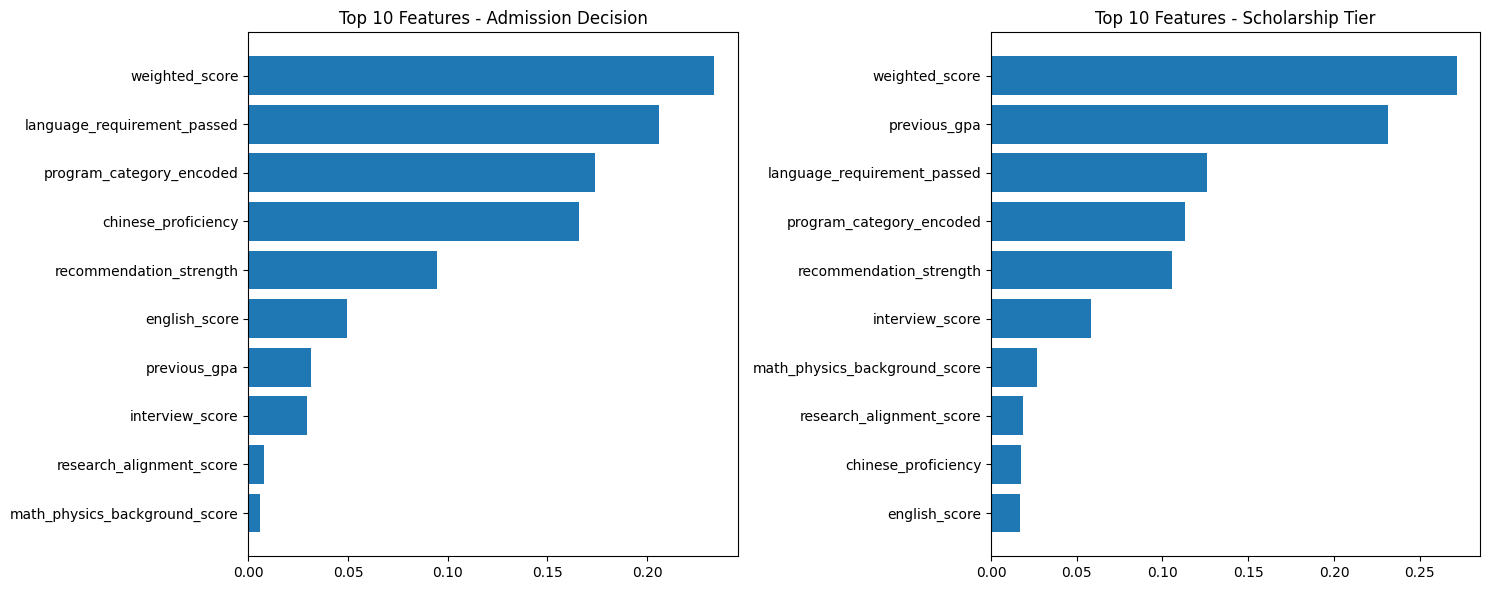

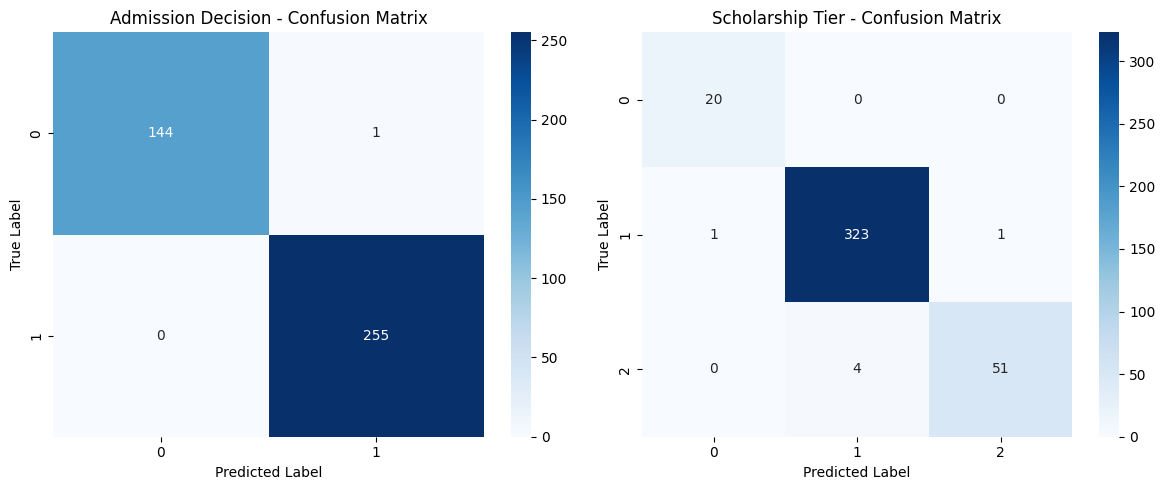

FINAL MODEL PERFORMANCE:
ADMISSION DECISION:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       145
           1       1.00      1.00      1.00       255

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


SCHOLARSHIP TIER:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.99      0.99      0.99       325
           2       0.98      0.93      0.95        55

    accuracy                           0.98       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.99      0.98      0.98       400



In [289]:
# Train best models and create visualizations
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_test, y_admission_train, y_admission_test = train_test_split(X_encoded, admission_target, test_size=0.2, random_state=42)
_, _, y_scholarship_train, y_scholarship_test = train_test_split(X_encoded, scholarship_target, test_size=0.2, random_state=42)

# Train best models
best_admission = XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1)
best_scholarship = XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1)

best_admission.fit(X_train, y_admission_train)
best_scholarship.fit(X_train, y_scholarship_train)

# Predictions
y_admission_pred = best_admission.predict(X_test)
y_scholarship_pred = best_scholarship.predict(X_test)

# Feature importance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Admission feature importance
admission_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': best_admission.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[0].barh(admission_importance['feature'], admission_importance['importance'])
axes[0].set_title('Top 10 Features - Admission Decision')
axes[0].invert_yaxis()

# Scholarship feature importance
scholarship_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': best_scholarship.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[1].barh(scholarship_importance['feature'], scholarship_importance['importance'])
axes[1].set_title('Top 10 Features - Scholarship Tier')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Admission confusion matrix
cm_admission = confusion_matrix(y_admission_test, y_admission_pred)
sns.heatmap(cm_admission, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Admission Decision - Confusion Matrix')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Scholarship confusion matrix
cm_scholarship = confusion_matrix(y_scholarship_test, y_scholarship_pred)
sns.heatmap(cm_scholarship, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Scholarship Tier - Confusion Matrix')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

print("FINAL MODEL PERFORMANCE:")
print("=" * 30)
print("ADMISSION DECISION:")
print(classification_report(y_admission_test, y_admission_pred))
print("\nSCHOLARSHIP TIER:")
print(classification_report(y_scholarship_test, y_scholarship_pred))